In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import math as mth
from scipy import stats as st
import matplotlib.pyplot as plt

import pandas as pd
import pandasql as ps
from pandasql import sqldf
from sklearn.model_selection import GridSearchCV

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
import datetime as dt

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score,accuracy_score, 



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

# размер графиков
rcParams['figure.figsize'] = 5,5

In [2]:
import pickle


with open('train.pkl', 'rb') as f:
    df_t = pickle.load(f)

In [3]:
import pickle


with open('test.pkl', 'rb') as f:
    df_test = pickle.load(f)

In [4]:
df_test['target'] = 2

In [5]:
df = pd.concat([df_t,df_test], ignore_index= True)# обеденим для удобства тест и трейн

In [6]:
df_test.shape

(90203, 191)

In [7]:
df.shape

(458913, 191)

In [8]:
df['customer_ID'].nunique()

458913

In [9]:
df.index

RangeIndex(start=0, stop=458913, step=1)

In [10]:
df['nn'] = df.index

In [11]:
df_cus = df[['customer_ID','target','nn']]

In [12]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,nn
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,...,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,...,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0,1
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,...,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0,2
3,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,2018-03-19,0.824219,0.009773,0.007851,1.001953,0.006886,0.395752,0.002855,0.006134,...,NaN,0.009399,0.007835,0.000957,NaN,0.009056,0.006943,0.001446,0,3
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-12,0.477051,0.000467,0.009415,1.008789,0.007774,0.267090,0.006126,0.125977,...,NaN,0.006012,0.005222,0.000937,NaN,0.009789,0.003704,0.006275,0,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Columns: 192 entries, customer_ID to nn
dtypes: category(11), datetime64[ns](1), float16(177), int64(2), object(1)
memory usage: 173.8+ MB


In [14]:
# В основном все переменные носят характер числовых(178) категории 11 и object 1

In [15]:
#df[['target']].query('target !=2')

In [16]:
df_t['target'].value_counts()/df_t.shape[0]*100
# В целом таргет имеет несбалансировку классов, что не очень хорощо
# дефотла только 25%. 

0    74.005858
1    25.994142
Name: target, dtype: float64

In [17]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368710 entries, 0 to 368709
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 136.8+ MB


In [18]:
# Посмотрим на характеристики пропусков.

In [19]:
null = (pd.DataFrame(df.isnull().sum(),columns=['null'])/df.shape[0]*100).sort_values(by  = 'null', ascending=False)
null.query('null >25').head(33)

,null
D_87,99.859450
D_88,99.819792
D_108,99.427560
D_111,99.198541
D_110,99.198541
B_39,99.105495
D_73,99.076296
B_42,98.661620
D_136,96.427427
D_134,96.427427


In [20]:
# Видим, что есть пул переменных у которых кол-во пропусков больше чем 25% процентов. Таковых у нас 33. 
#В целом не очень хорошие переменные, При этом 50% пропусков имеют 29 переменных, что не сильно отличается.
#Большинство относящиеся к группе D. Есть и категориальные.
#Корректнее будет не задействать эти переменные в обучении. А все что имеет пропуска меньще 25% заменить медианой. 

Медиана, как показывает практика не смещает распределение данных в отличии от той же средней

In [22]:
#B_30, B_38, D_114, D_116, D_117, D_120, D_126, D_63, D_64, D_66, D_68

Посмотрим на категориальные переменные

In [23]:
df_tr = df[['target']].reset_index()
df_disr  = df.select_dtypes(include='category').reset_index()
df_tr
df_disr = df_disr.merge(df_tr,on=('index'), how ='left')
df_disr = df_disr.drop(columns=['index','D_63','D_64','D_66','target'], axis =1)

In [24]:
df_disr

,D_68,B_30,B_38,D_114,D_116,D_117,D_120,D_126
0,6.0,0.0,2.0,1.0,0.0,4.0,0.0,1.0
1,6.0,0.0,2.0,1.0,0.0,-1.0,0.0,1.0
2,6.0,0.0,1.0,1.0,0.0,-1.0,0.0,1.0
3,6.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
4,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
458908,6.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0
458909,6.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0
458910,5.0,0.0,2.0,1.0,0.0,5.0,0.0,1.0
458911,6.0,1.0,6.0,1.0,0.0,2.0,0.0,1.0


In [25]:
# Посмотрим на категориальные переменные в разрезе таргета

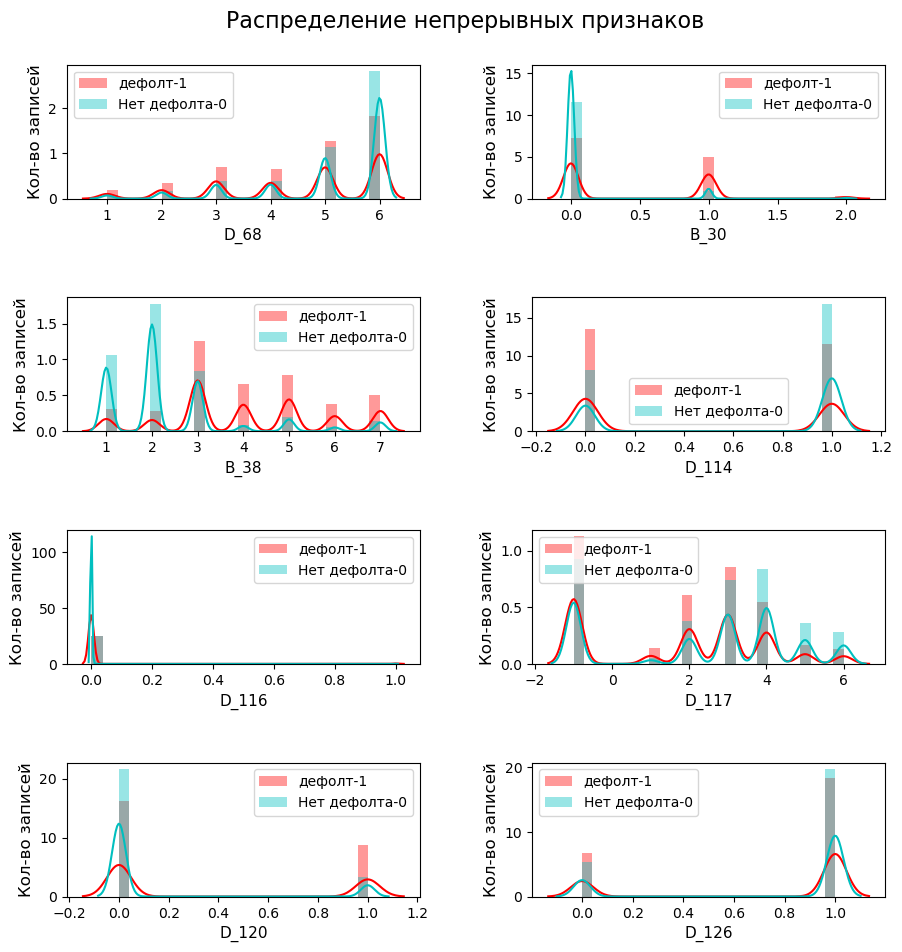

In [26]:
df_tr = df[['target']].reset_index()
df_disr  = df.select_dtypes(include='category').reset_index()
df_tr
df_disr = df_disr.merge(df_tr,on=('index'), how ='left')
df_disr = df_disr.drop(columns=['index','D_63','D_64','D_66'], axis =1)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение непрерывных признаков', fontsize=16)
for feature in df_disr.drop('target', 1).columns.tolist():
    ax = axes_list.pop(0)
    sns.distplot(df_disr.query('target == 1')[feature], bins=25, ax=ax, kde=True, color='r',label='дефолт-1')

    sns.distplot(df_disr.query('target == 0')[feature], bins=25, ax=ax, kde=True, color='c',label='Нет дефолта-0')
#     ax.set_title('ОСТАЛИСЬ (churn = 0)')
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Кол-во записей', fontsize=12)
    ax.legend()

Очень странные категории - большая часть зашифрованы с минусовыми значениями.
При случае незнания, можно было бы опеределить некоторые категороии как int. с учетом отрицательных значений

Есть категории, значения которых определены как текст- оценим их

In [27]:
df['D_63'].value_counts()/df.shape[0]*100

CO    75.153678
CR    15.945942
CL     7.685771
XZ     0.711028
XM     0.327513
XL     0.176068
Name: D_63, dtype: float64

In [28]:
df['D_64'].value_counts()/df.shape[0]*100

O     53.304657
U     28.920950
R     15.587268
       2.187125
-1     0.000000
Name: D_64, dtype: float64

In [29]:
df_t[['S_2']].value_counts().sum()

368710

In [30]:
df['D_64'].unique()# Оченнь странная переменная D_64, где есть значение которые пусто, но пределено как '' 
#как отсутвие значения. И есть название '-1' Придется это как-то заменить.

['O', 'R', 'U', '']
Categories (5, object): ['', '-1', 'O', 'R', 'U']

In [31]:
# Произведем замену.
df['D_64'] = df['D_64'].replace('', 'S')
df['D_64'] = df['D_64'].replace('-1', 'E')

In [33]:
# Посмотри на признаки с максимальной корреляций на таргет и для ТОП-10 построим ящики с усами.
corr = pd.DataFrame(df.corr()['target'].sort_values(ascending = False).head(12))
corr

,target
target,1.000000
nn,0.597316
D_48,0.276780
D_61,0.245265
D_55,0.240029
B_9,0.235837
D_44,0.235536
D_58,0.223547
D_75,0.223386
B_3,0.222865


In [34]:
corr.T.columns

Index(['target', 'nn', 'D_48', 'D_61', 'D_55', 'B_9', 'D_44', 'D_58', 'D_75',
       'B_3', 'B_7', 'B_23'],
      dtype='object')

In [739]:
len(columns_to_plot)

10

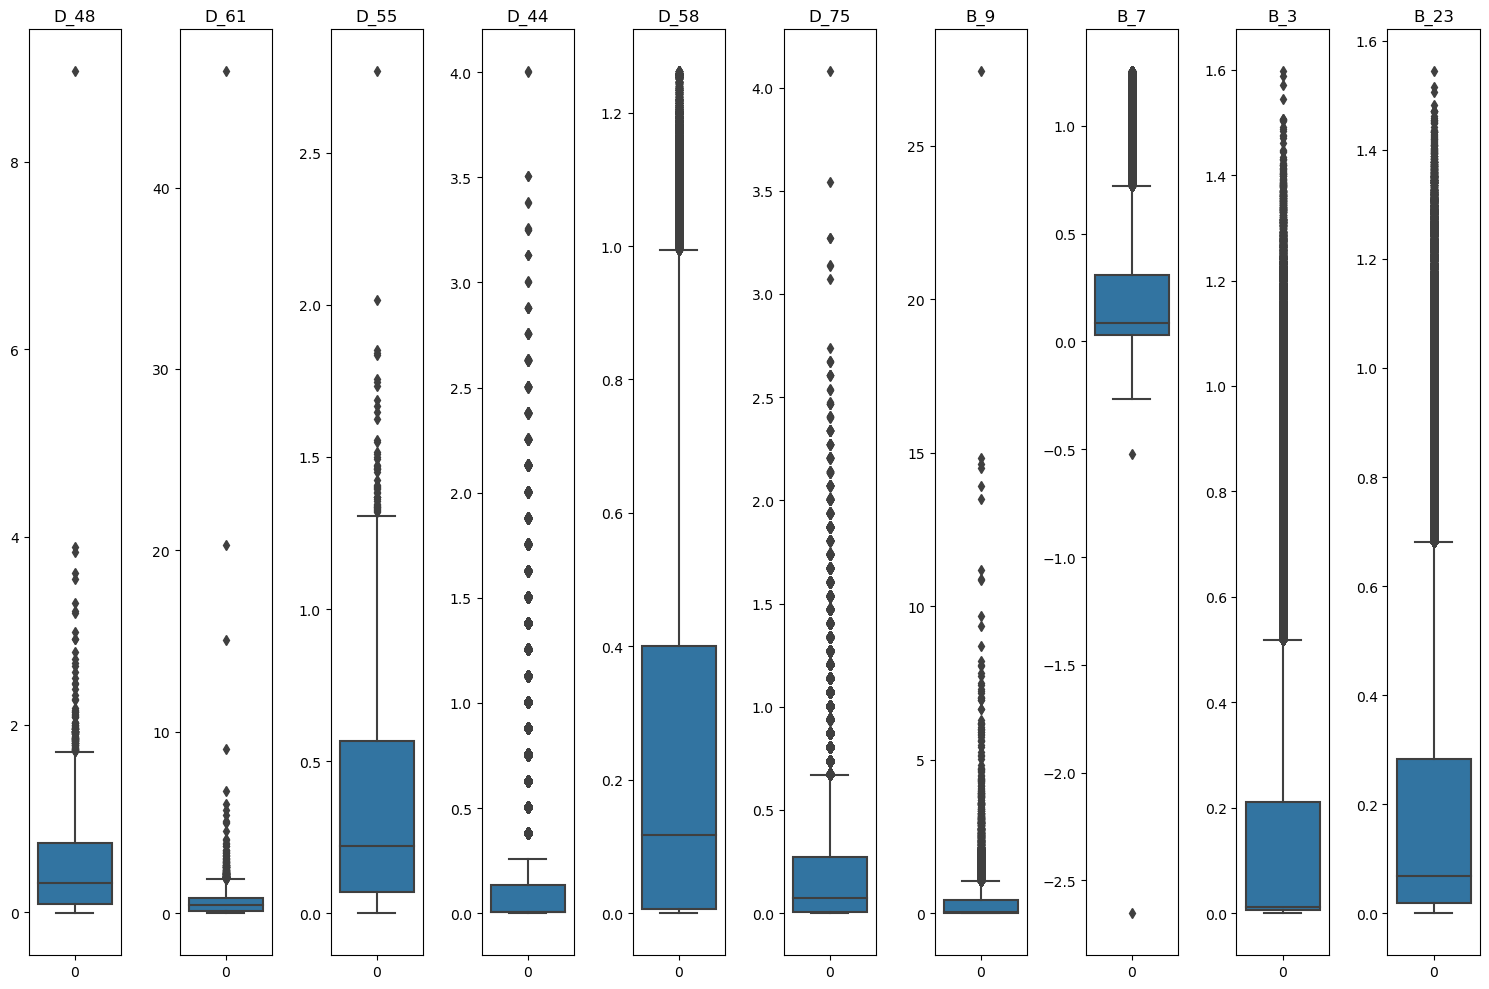

In [35]:
# размер графиков
rcParams['figure.figsize'] = 15,10
# Store the list of columns
columns_to_plot = ['D_48', 'D_61', 'D_55', 'D_44', 'D_58', 'D_75', 'B_9', 'B_7',
       'B_3', 'B_23']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='S_2', ylabel='count'>

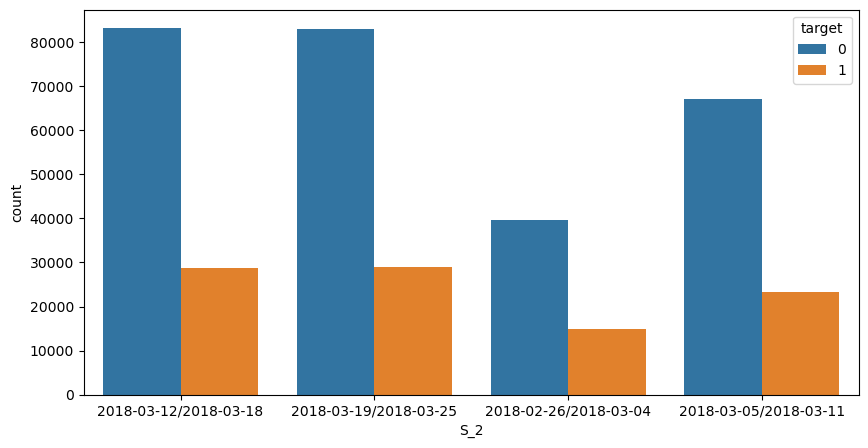

In [36]:
# Посмотрим, как распределяются клиенты и таргеты относитьельно временной переменной. для этого вычислим
# из него позицию недели
df_dt = df[['S_2','target','customer_ID']].query('target !=2')
df_dt['S_2'] = df_dt['S_2'].dt.to_period('W')
# размер графиков
rcParams['figure.figsize'] = 10,5
sns.countplot(data=df_dt, x="S_2", hue="target")

В целом нас здесь интересовало как распределяется позиции по времени. Вдруг, здесь есть клиенты 10тней давности.
Или есть зависимоть влияния дефолта относитетельно времени. Как мы видим, доля дефолта и отсутвие дефолта
примерно равны отностительно недели/месяца. Плюс как мы видим, данные у нас только одного месяца. Вдруг у нас так, что и тест другого мемяца  - посмотрим на это.

<Axes: xlabel='S_2', ylabel='count'>

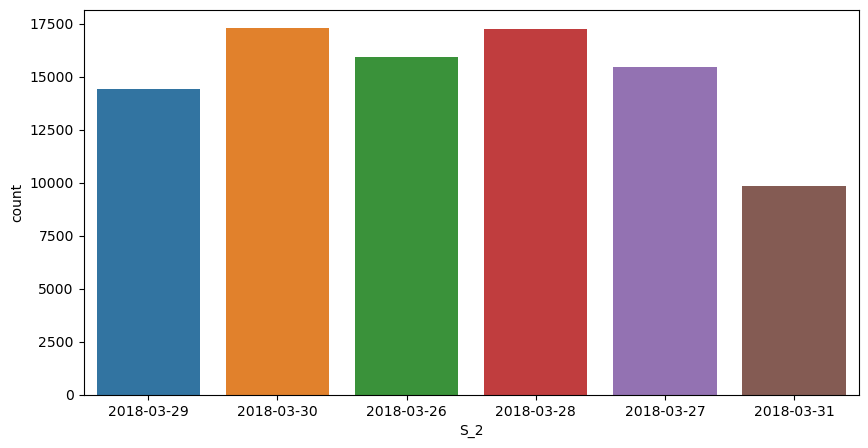

In [37]:
df_dt = df_test[['S_2','customer_ID']]
df_dt['S_2'] = df_dt['S_2'].dt.to_period('D')
# размер графиков
rcParams['figure.figsize'] = 10,5
sns.countplot(data=df_dt, x="S_2")

Видно, что обучающие данные конца февраля и всего марта. А тест только последних 5 дней марта. Разумеется будут проблемы к валидации модели. Иными словами обучаем модель на ранних данных,  а валидируем на поздних. К этому есть вопросы.
Это значит, что тренировать модель нужно на поздних данных, а верифицировать на ранних. В таком случае будет корректно.
В обычном значении, у нас нет зависмости от временого лага. Другими словами, берем ранние данные и смотрим, что будет
с поздними.

In [38]:
# Стоит обратить внимание на то, что некоторые переменные могут носитьт отрицательные значения.
df_disr2  = df.select_dtypes(include='float16').reset_index()
df_disr2.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
index,458913.0,229456.000000,132476.916380,0.000000e+00,114728.000000,229456.000000,344184.000000,458912.000000
P_2,455944.0,NaN,0.000000,-4.589844e-01,0.449219,0.682617,0.862305,1.009766
D_39,458913.0,NaN,0.000000,5.960464e-08,0.004784,0.009560,0.266602,5.000000
B_1,458913.0,0.000000,0.231201,-3.570312e+00,0.008987,0.033234,0.153687,1.324219
B_2,458882.0,NaN,0.000000,1.788139e-07,0.070923,0.813477,1.001953,1.009766
R_1,458913.0,0.000000,0.278564,5.960464e-08,0.002956,0.005920,0.008888,2.759766
S_3,373943.0,NaN,0.000000,-5.087891e-01,0.127563,0.164917,0.264893,3.994141
D_41,458882.0,0.000000,0.303955,5.960464e-08,0.003008,0.006012,0.008995,8.992188
B_3,458882.0,NaN,0.000000,5.960464e-08,0.005486,0.010834,0.210693,1.596680
D_42,59910.0,0.177856,0.253662,-2.404451e-04,0.031769,0.108276,0.230347,4.187500


НА основе трейн_даты создадим трейн и и тест. Ибо как было сказано, у тест-данных отсутсвует таргет.

Посмотрим на распределение клиентов в рамках дат, чтобы сделать разбивку выборки

In [39]:
dt_time = pd.DataFrame(df_t[['S_2']].value_counts().reset_index()).sort_values(by = 'S_2')
dt_time['per'] = dt_time[0]/df.shape[0]*100
dt_time

,S_2,0,per
16,2018-03-01,12128,2.642767
17,2018-03-02,10562,2.301526
1,2018-03-03,22887,4.987220
21,2018-03-04,8918,1.943288
18,2018-03-05,10081,2.196713
19,2018-03-06,9736,2.121535
20,2018-03-07,9097,1.982293
13,2018-03-08,15581,3.395197
12,2018-03-09,15737,3.429190
2,2018-03-10,21547,4.695225


Таким образом видно, какая доля наблюдений приходится на каждую дату. Итого, 
примерено после 2018-03-18 можно определять данные как тест. Это примерно чуть больше 25%

In [40]:
# Перерведем категориальные переменные в дамми переменные.

In [41]:
df_disr  = df.select_dtypes(include='category').reset_index()
df_disr = df_disr.drop(columns=['D_66'], axis =1)
df_m = pd.get_dummies(df_disr).reset_index()
df_int = df.select_dtypes(include=['float16','int','datetime64']).reset_index()
df_new = df_int.merge(df_m,on=('index'), how ='left')

In [42]:
null.query('null >25').T.columns# определим и исключим из трейн переменные  у которых больше 25% пропусков.

Index(['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42',
       'D_136', 'D_134', 'D_137', 'D_138', 'D_135', 'R_9', 'B_29', 'D_76',
       'R_26', 'D_106', 'D_132', 'D_49', 'D_66', 'D_42', 'D_142', 'D_82',
       'D_53', 'D_50', 'D_105', 'D_56', 'B_17', 'D_77', 'S_9', 'D_43', 'S_27'],
      dtype='object')

In [43]:
df_new = df_int.merge(df_m,on=('index'), how ='left')
df_new = df_new.drop(columns = ['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42',
       'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'R_9', 'B_29', 'D_76',
       'R_26', 'D_106', 'D_132', 'D_49', 'D_42', 'D_142', 'D_82',
       'D_53', 'D_50', 'D_105', 'D_56', 'B_17', 'D_77', 'S_9', 'D_43', 'S_27'],axis =1)
df_new_train = df_new.fillna(df_new.median())# меняем на медиану, все оставшиеся пропуска.

In [751]:
#df_new_train = df_new_train[[
#'target', 'D_48', 'B_9', 'D_61', 'D_55', 'D_44', 'B_3', 'B_7', 'D_75',
     #  'D_58', 'B_23', 'R_1', 'B_16', 'B_4', 'D_74', 'B_20', 'B_19', 'B_1',
       #'B_37', 'B_11', 'R_2', 'B_22', 'B_30_1.0', 'D_41', 'S_7', 'R_4', 'D_78',
      # 'S_3', 'D_39', 'D_70'
#]]

In [44]:
# Посмотри на признаки с максимальной корреляций на таргет
pd.DataFrame(df_new_train.corr()['target'].sort_values(ascending = False).head(12)).reset_index()

,index,target
0,target,1.000000
1,index,0.597316
2,nn,0.597316
3,level_0,0.597316
4,D_48,0.262448
5,B_9,0.235837
6,D_55,0.233631
7,D_61,0.233162
8,D_44,0.228920
9,D_58,0.223547


In [429]:
#pd.DataFrame(df_new_train.corr()['target'].sort_values(ascending = False).head(30)).T.columns

In [45]:
# разделяем модель на обучающую и валидационную выборку метод train_test_split не поможет
X_train_base  = df_new_train.query('target ==2')
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X_train  = df_new_train.query('S_2 > "2018-03-18" and target !=2').drop(['index','target','nn','S_2'],1)
X_test = df_new_train.query('S_2 <= "2018-03-18" and target !=2').drop(['index','target','nn','S_2'],1)

X = df_new_train.query('S_2 > "2018-03-18" and target !=2').drop(['index','target','nn','S_2'],1)
Y = df_new_train.query('S_2 <= "2018-03-18" and target !=2').drop(['index','target','nn','S_2'],1)

y_train = df_new_train.query('S_2 > "2018-03-18" and target !=2')[['target']]
y_test = df_new_train.query('S_2 <= "2018-03-18" and target !=2')[['target']]


# стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear',class_weight='balanced', random_state = 42)

# обучим модель
model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test)[:,1]

# бинарный прогноз
predictions = model.predict(X_test)

# выведите  метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))

Accuracy: 0.88
Precision: 0.71
Recall: 0.90
F1: 0.80
ROC_AUC: 0.89


НА уровне простой логистической регресии у нас, roc 89%. Дооубучим модель

In [485]:
param_grid = {'C': np.logspace(-3, 3, 25),
'penalty': ['l1', 'l2']}

model = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc')

model = model.fit(X_train, y_train)
print(model.best_estimator_)

LogisticRegression(C=0.005623413251903491, random_state=42)


In [47]:
# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear',class_weight='balanced',C=0.005623413251903491, random_state = 42)

# обучим модель
model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test)[:,1]

# бинарный прогноз
predictions = model.predict(X_test)

# выведите  метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))

Accuracy: 0.88
Precision: 0.71
Recall: 0.90
F1: 0.80
ROC_AUC: 0.89


После обучения модель не стала сиильно лучше.

Посмотрим как выгддит площадт под кривой

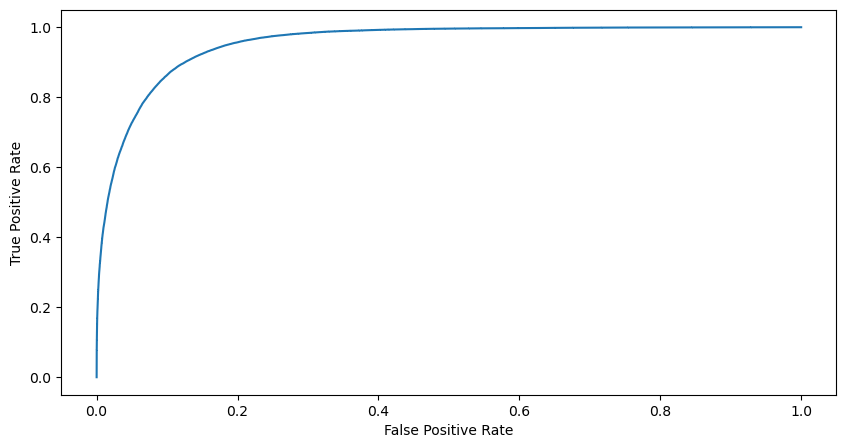

In [48]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
rcParams['figure.figsize'] = 10,5
#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

### ТОР -10 самых сильных фичей

In [49]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head(10)

,Feature,Importance
0,P_2,0.906426
9,B_4,0.368075
1,D_39,0.339535
7,B_3,0.249614
19,D_51,0.239723
21,R_3,0.236456
3,B_2,0.218958
6,D_41,0.204317
78,B_28,0.203323
136,D_131,0.199225


In [52]:
# зададим алгоритм для нашей модели
model2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=42)

# обучим модель
model2.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model2.predict_proba(X_test)[:,1]

# бинарный прогноз
predictions = model2.predict(X_test)

# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))

Accuracy: 0.89
Precision: 0.81
Recall: 0.78
F1: 0.79
ROC_AUC: 0.86


Градиентный бустинг на 1000 деревьев не делает модель лучше

In [53]:
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': model2.feature_importances_})
grad_per = (fi_df.sort_values('importance', ascending=False).head(10))
grad_per

,feature,importance
0,P_2,0.737743
3,B_2,0.080498
12,R_2,0.028600
9,B_4,0.019060
5,S_3,0.015858
21,R_3,0.015368
6,D_41,0.014226
10,D_45,0.010620
117,B_37,0.007835
136,D_131,0.005719


In [ ]:
Создадим прогноз по финальной модели

In [54]:
X_train_base2 = X_train_base.query('target ==2').drop(['index','target','nn','S_2'],1)
X_train_base2 = scaler.transform(X_train_base2)
nn = pd.DataFrame(X_train_base['nn']).reset_index()
prog = pd.DataFrame(model.predict_proba(X_train_base2)[:,1])

In [55]:
doc_cus_prog = nn.merge(prog, left_index=True, right_index=True).merge(df_cus.query('target ==2'),on = ['nn'])[[0,'customer_ID']]
doc_cus_prog

,0,customer_ID
0,0.999998,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...
1,0.999997,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...
2,0.999984,00018dd4932409baf6083519b52113c2ef58be59e1213e...
3,1.000000,000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af1...
4,0.999998,00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b7...
...,...,...
90198,0.999995,fffc59f2e1aa4de05de451121a35c26c61e63cfc38328a...
90199,0.999997,fffd1a37da07c54a930788ab53061cd7bd34d38592205e...
90200,0.999958,fffdc0cf228085b4275b38ebe6eb915766af3fecb2ae28...
90201,1.000000,fffe39594fad367d9eb8ae18537b56b0739c4cc3ab9810...


In [869]:
#doc_cus_prog.to_excel("submission.xlsx")